In [2]:
import matplotlib.pyplot as plt
import numpy as np
from astroML.datasets import generate_mu_z
from sklearn.linear_model import LinearRegression
from astroML.linear_model import PolynomialRegression
import seaborn as sns
import tqdm 
from sklearn.model_selection import learning_curve


## Time to get your hands dirty! Supernova distances and redshifts (part 1)

Measuring the cosmological relationship between distance and redshift is at the heart of the entire field of cosmology and allowed, among other things, the discovery of dark energy! At high redshifts, this is done with Type Ia Supernova which are standard (or better, standardizable) candles.

This is a [Nobel prize](https://www.nobelprize.org/prizes/physics/2011/riess/facts/) plot by [Riess et al](https://iopscience.iop.org/article/10.1086/300499)

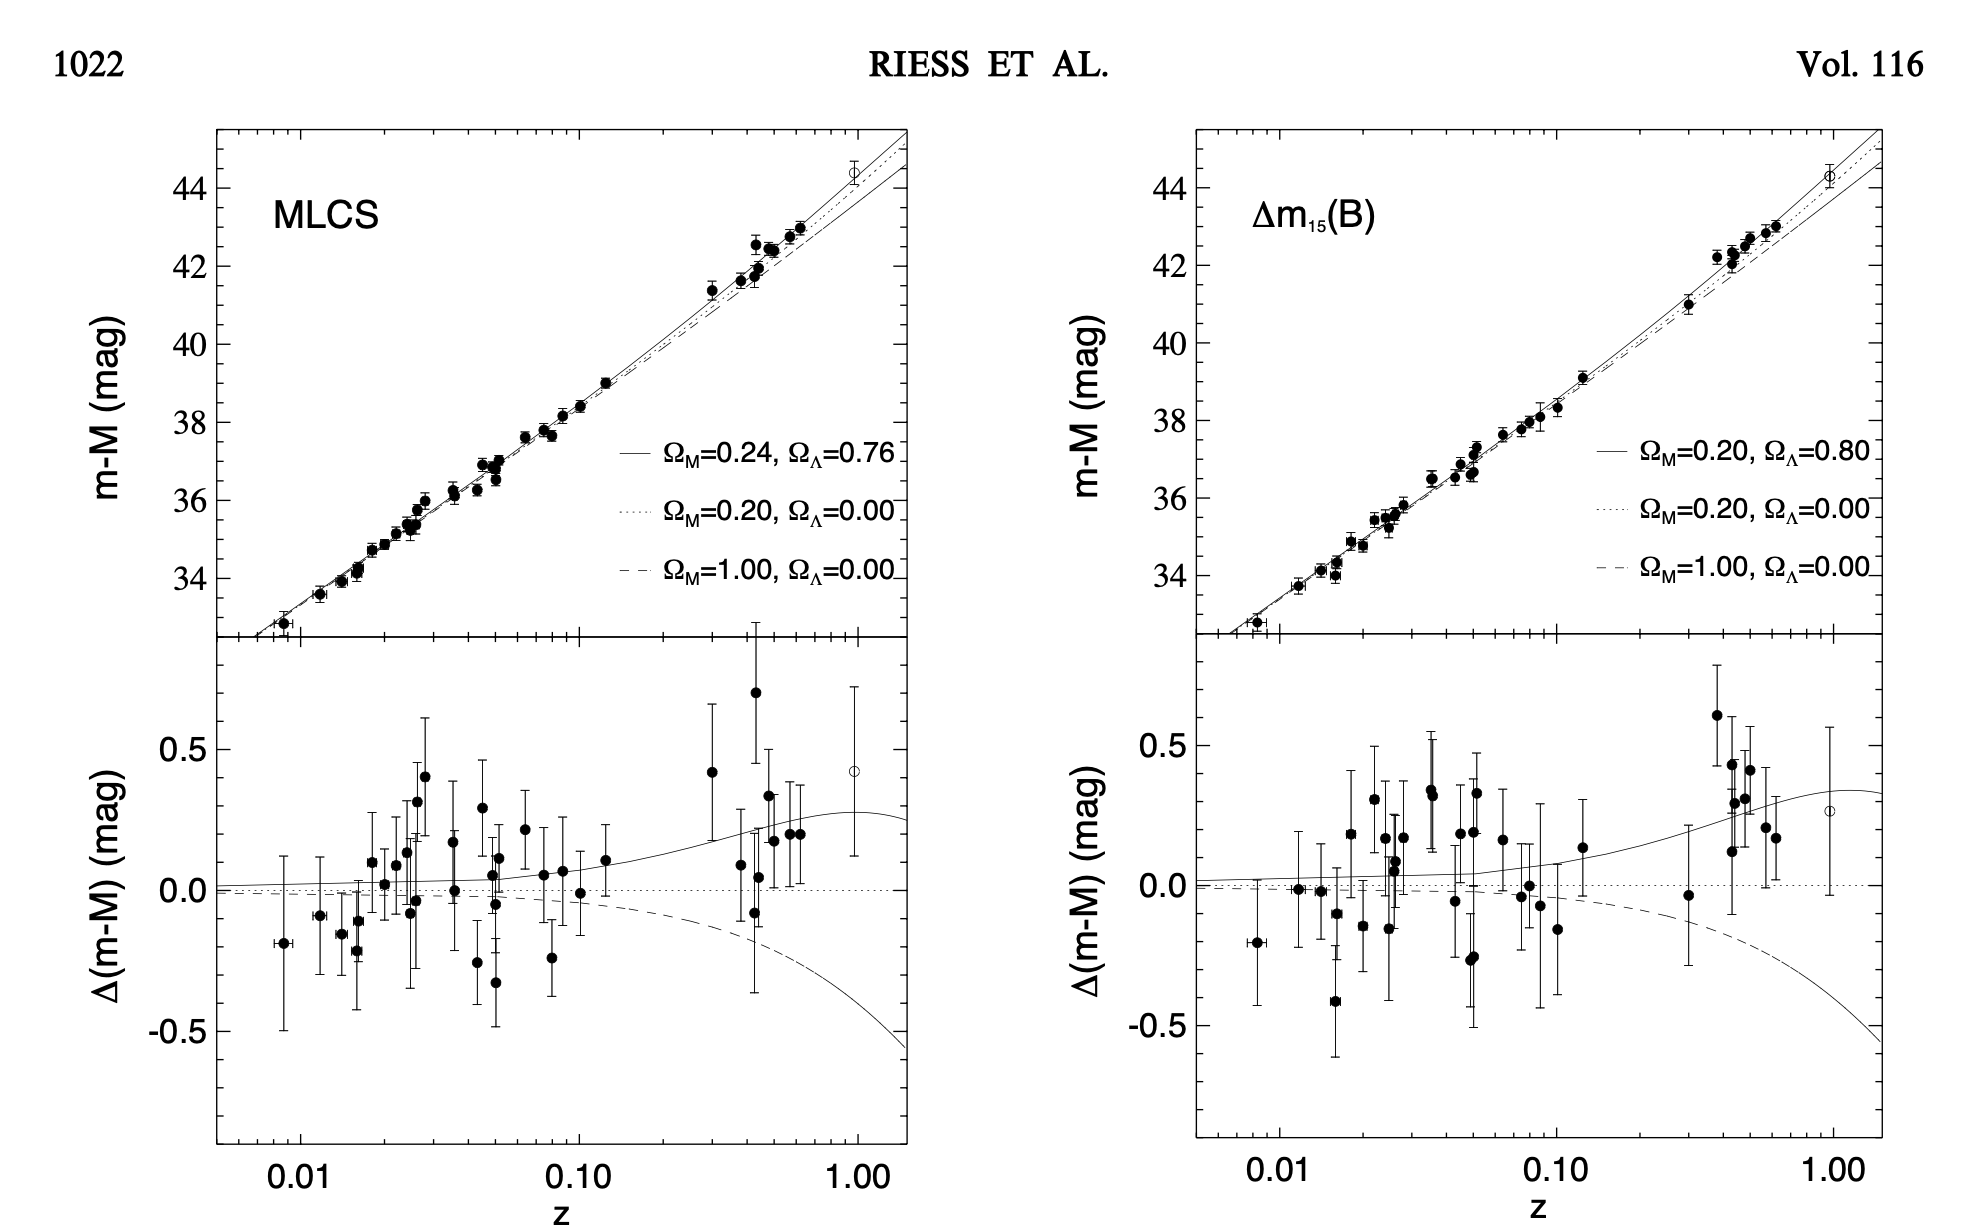

Let's recall the definition of magnitude and the distance modulus (ah! the astronomers...)

$$
\mu = m-M =  5 \log_{10}\left(\frac{d_L}{\rm pc}\right) - 5
$$

Here is the Hubble diagram for Type Ia supernovae (which are standard candels). The lines show the predictions for cosmologies with varying amounts of Ωm and ΩΛ. The observed points all lie above the line for a universe with zero Λ. The lower panel, with the slope caused by the inverse square law taken out, shows the difference between the predictions more clearly and shows why a model with ΩΛ > 0 is favored. 

####  Tasks

- First, explore fitting this data with the tecniques we have seen.
- Start from linear regression and polynomial regression
- For the case of  polynomial regression, just fit many of them for now.
- Let's bet based on intuition! Which fit is the best?
- In what cases are you underfitting the data?
- In what cases are you overfitting the data?
- Now split the data into training and validation sets
- Implement a cross-validation procedure
- Pick the best!
- Does it agree with our bets?

#### If you have time (or later at home...)

- Repeat with Basis Function Regression and Kernel Regression
- Explore what happens when you change the number of datapoints and plot the resulting learning curves.

<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_230790/3681853022.py:5: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu=m-M$")


(35.0, 50.0)

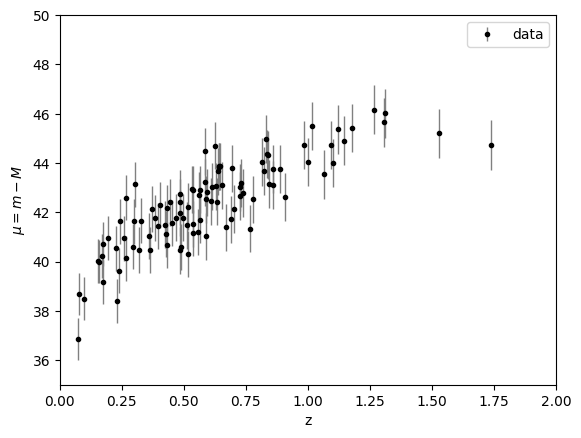

In [3]:
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234)

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu=m-M$")
plt.legend()
plt.xlim(0,2)
plt.ylim(35,50)

## linear regression

<>:34: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_230790/3079021177.py:34: SyntaxWarning: invalid escape sequence '\m'
  axes[0].set_ylabel("$\mu = m-M$", fontsize=12)


39.56505554722625 [4.64711848]


/tmp/ipykernel_230790/3079021177.py:38: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  axes[1].plot(train_sizes, -test_scores_linreg.mean(1), 'o-', markersize=4, linestyle="--", color="teal", label="validation")


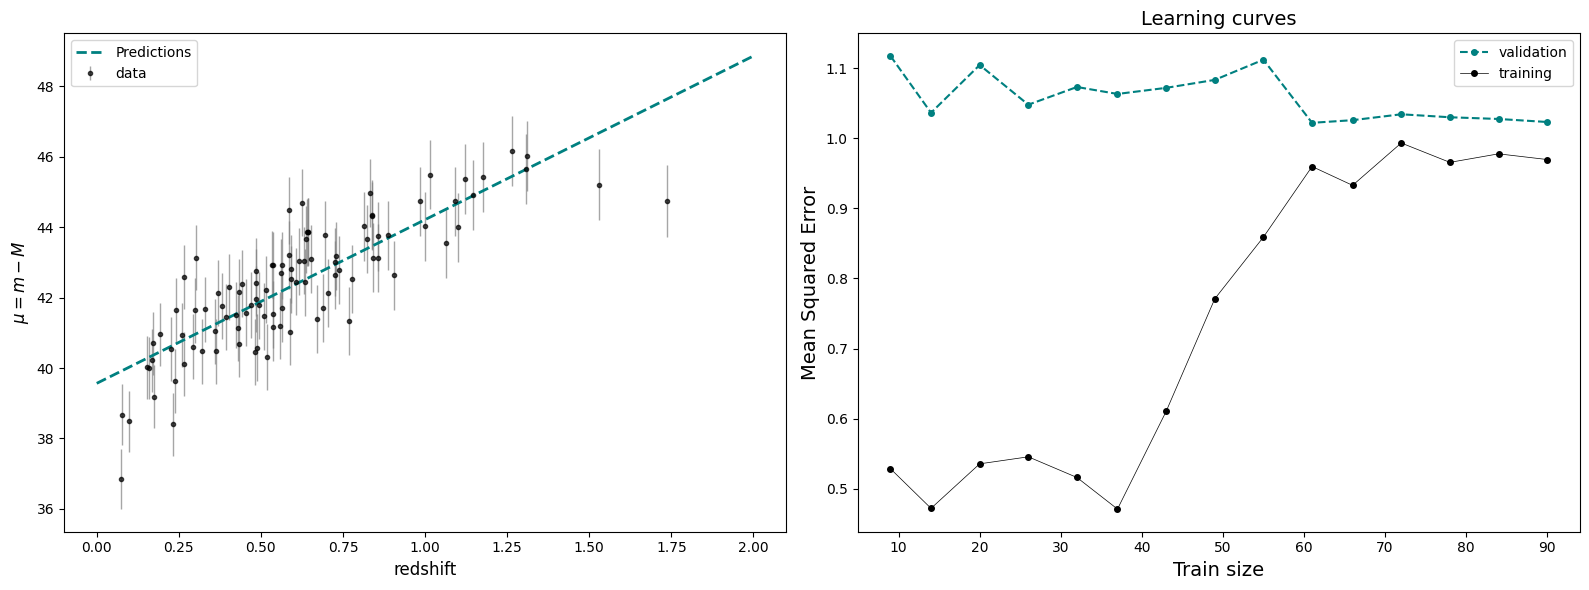

In [4]:
x_grid_1d = np.linspace(0,2, 100)
x_grid = x_grid_1d[:, np.newaxis]


x = z_sample[:, np.newaxis]
y = mu_sample

lin_reg = LinearRegression()
lin_reg.fit(x, y, sample_weight=1.0)

theta0 = lin_reg.intercept_
theta1 = lin_reg.coef_

print(theta0, theta1)
y_pred2 = lin_reg.predict(x_grid)


y_pred = theta0 + theta1*x_grid  # Complete 
fig, axes = plt.subplots(1, 2, figsize=(16, 6))



# Ten training sample sizes from 10% to 100%
train_sizes, train_scores_linreg, test_scores_linreg = \
    learning_curve(lin_reg, x, y, train_sizes=np.linspace(0.1, 1, 15), \
    scoring="neg_mean_squared_error", cv=10)



# plot 1: Linear Regression Predictions
axes[0].errorbar(x, y, dmu, fmt='.k', ecolor='gray', alpha=0.7, lw=1, label='data')
axes[0].plot(x_grid, y_pred, color="teal", linestyle="--", linewidth=2, label="Predictions")
axes[0].set_xlabel("redshift", fontsize=12)
axes[0].set_ylabel("$\mu = m-M$", fontsize=12)
axes[0].legend(loc="upper left", fontsize=10)

# plot 2: Learning Curves
axes[1].plot(train_sizes, -test_scores_linreg.mean(1), 'o-', markersize=4, linestyle="--", color="teal", label="validation")
axes[1].plot(train_sizes, -train_scores_linreg.mean(1), 'o-', markersize=4, color="black", linewidth=0.5, label="training")
axes[1].set_xlabel("Train size", fontsize=14)
axes[1].set_ylabel("Mean Squared Error", fontsize=14)
axes[1].set_title('Learning curves', fontsize=14)
axes[1].legend(loc="best")

plt.tight_layout()
plt.show()


## polynomial regression

<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_230790/1685118071.py:16: SyntaxWarning: invalid escape sequence '\m'
  axes[0].set_ylabel("$\mu = m-M$", fontsize=12)
/tmp/ipykernel_230790/1685118071.py:28: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  axes[1].plot(train_sizes, -test_scores_linreg.mean(1), 'o-', markersize=4, linestyle="--", color="teal", label="validation")


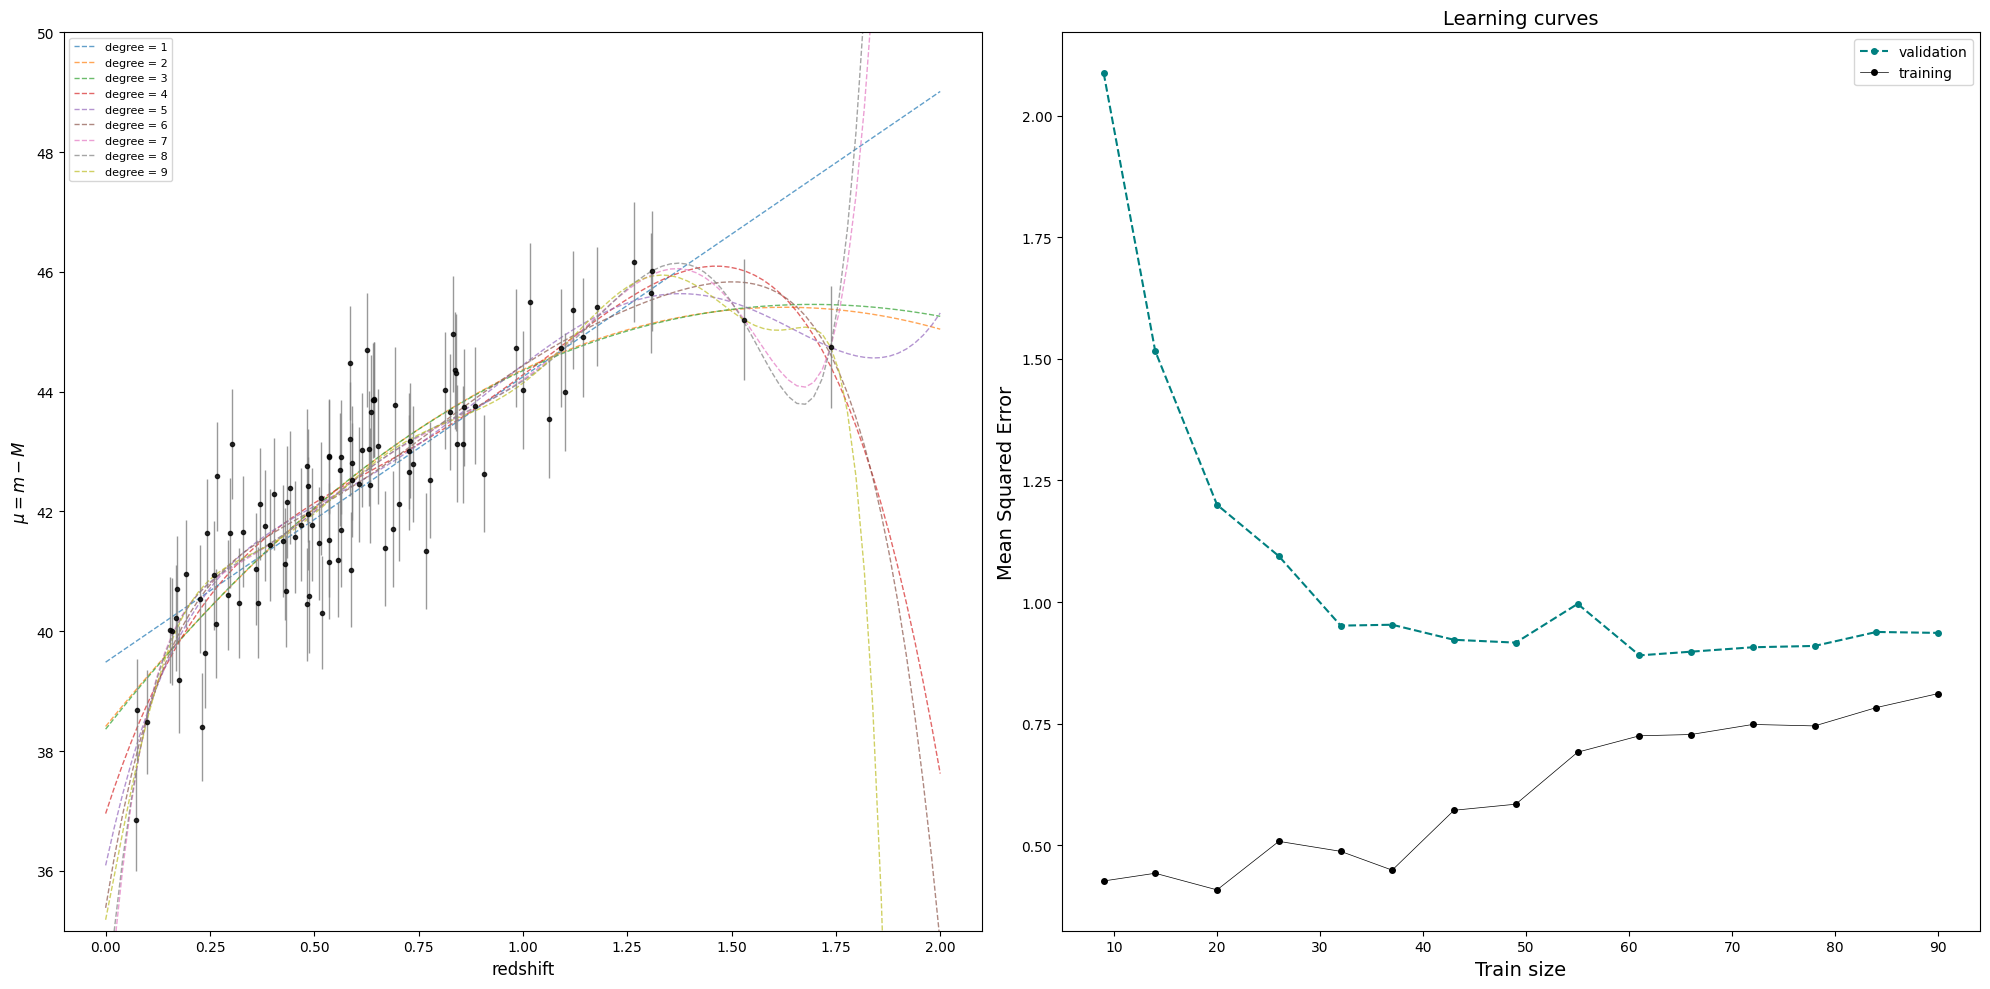

In [5]:
from astroML.linear_model import PolynomialRegression

colors = sns.color_palette()
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plot 1: Polynomial Regression fits
for degree in range(1, 10):
    color_ = colors[degree - 1]
    model = PolynomialRegression(degree)
    model.fit(x, y, dmu)
    y_pred = model.predict(x_grid)
    n_constraints = degree + 1

    axes[0].plot(x_grid, y_pred, linestyle="--", color=color_, alpha=0.7, linewidth=1, label="degree = %i" % degree)
    axes[0].set_xlabel("redshift", fontsize=12)
    axes[0].set_ylabel("$\mu = m-M$", fontsize=12)
    axes[0].legend(loc="upper left", fontsize=8)
    axes[0].set_ylim(35, 50)

axes[0].errorbar(x, y, dmu, fmt='.k', ecolor='gray', alpha=0.8, lw=1, label='data')

# Plot 2: Learning curves, using a third degree polynomial
pol_reg = PolynomialRegression(3)
train_sizes, train_scores_linreg, test_scores_linreg = \
    learning_curve(pol_reg, x, y, train_sizes=np.linspace(0.1, 1, 15), \
    scoring="neg_mean_squared_error", cv=10)

axes[1].plot(train_sizes, -test_scores_linreg.mean(1), 'o-', markersize=4, linestyle="--", color="teal", label="validation")
axes[1].plot(train_sizes, -train_scores_linreg.mean(1), 'o-', markersize=4, color="black", linewidth=0.5, label="training")

axes[1].set_xlabel("Train size", fontsize=14)
axes[1].set_ylabel("Mean Squared Error", fontsize=14)
axes[1].set_title('Learning curves', fontsize=14)
axes[1].legend(loc="best")

plt.tight_layout()
plt.show()


## kernel

<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_230790/858605286.py:14: SyntaxWarning: invalid escape sequence '\m'
  axes[0].set_ylabel("$\mu = m-M$", fontsize=12)
/home/malvi/venv/lib/python3.12/site-packages/astroML/linear_model/kernel_regression.py:52: RuntimeWarning: invalid value encountered in divide
  return (K * self.y).sum(1) / K.sum(1)
/tmp/ipykernel_230790/858605286.py:26: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  axes[1].plot(train_sizes, -test_scores_kernel.mean(1), 'o-', markersize=4, linestyle="--", color="teal", label="validation")


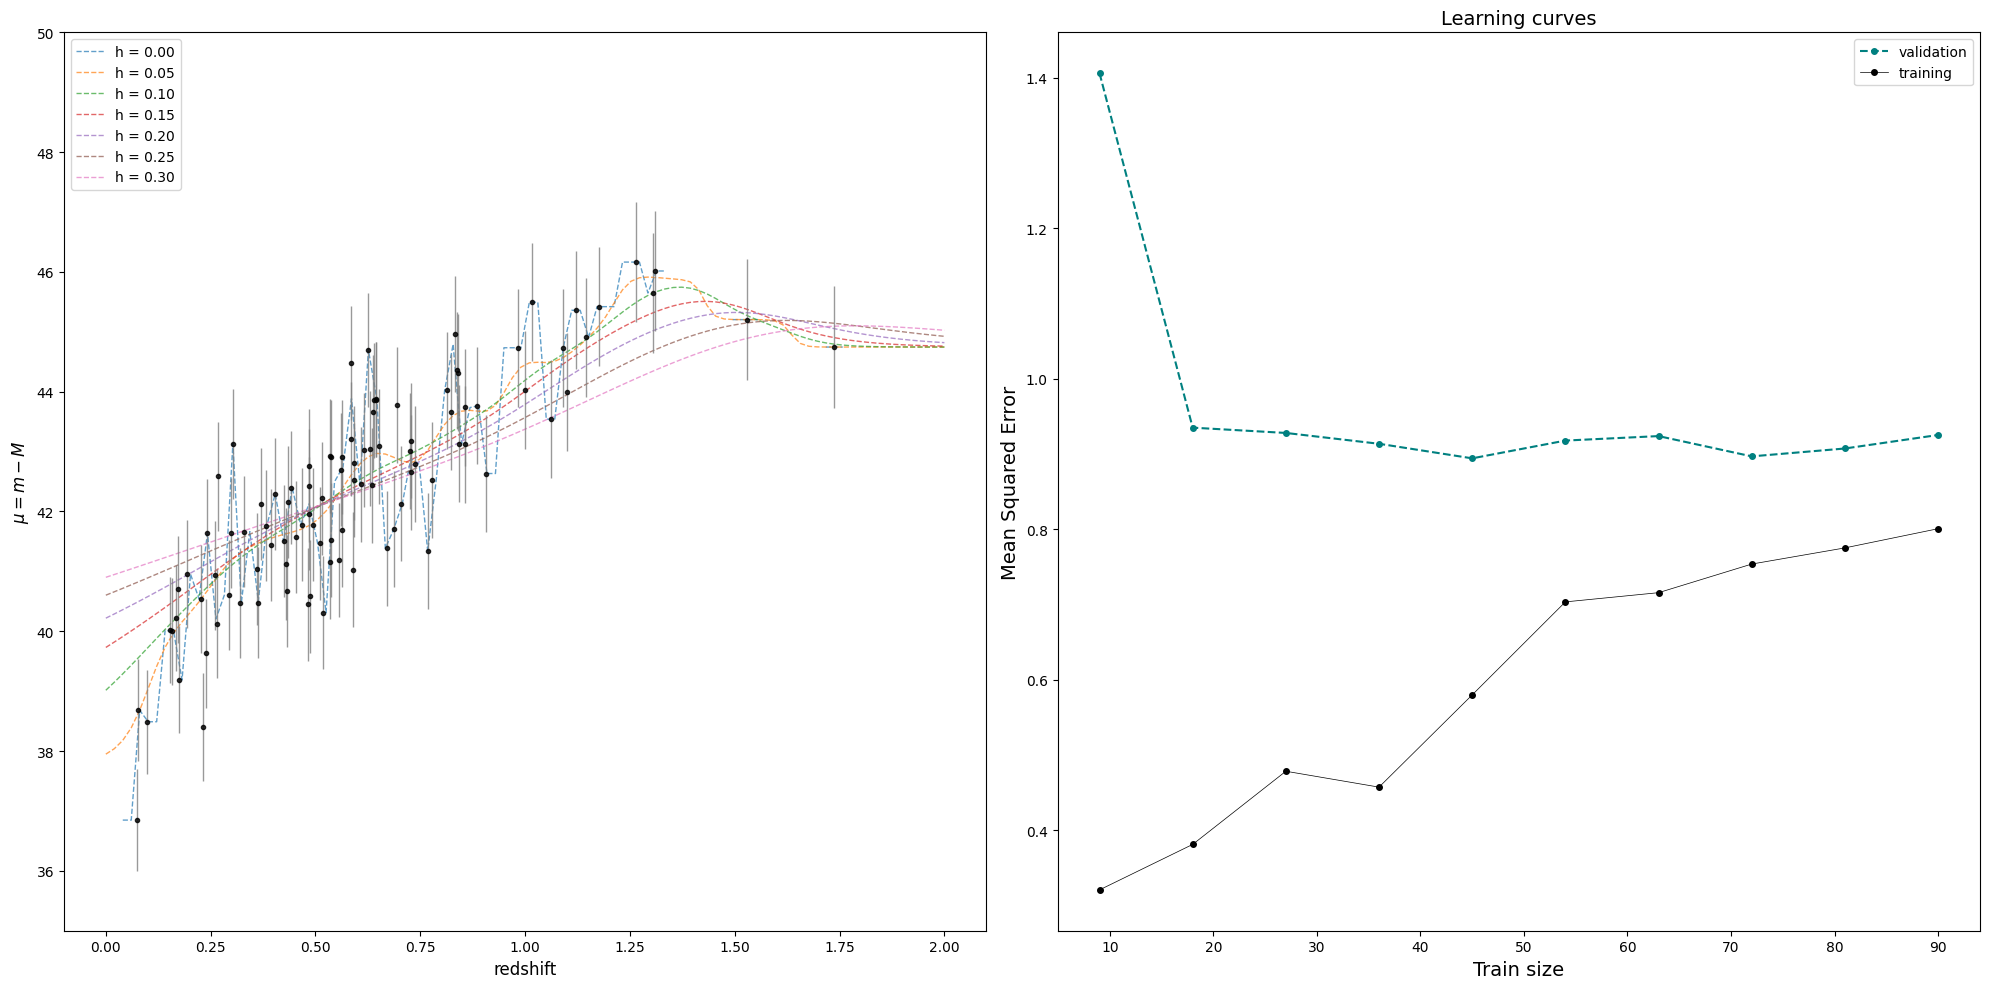

In [6]:
from astroML.linear_model import NadarayaWatson
 
h =  np.linspace(0.001, 0.30, 7)
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plot 1: Kernel Regression fits
for i in h:
    model = NadarayaWatson(kernel='gaussian', h=i)
    model.fit(x, y)
    y_pred = model.predict(x_grid)

    axes[0].plot(x_grid, y_pred, linestyle="--", alpha=0.7, linewidth=1, label="h = %.2f" % i)
    axes[0].set_xlabel("redshift", fontsize=12)
    axes[0].set_ylabel("$\mu = m-M$", fontsize=12)
    axes[0].legend(loc="upper left", fontsize=10)
    axes[0].set_ylim(35, 50)

axes[0].errorbar(x, y, dmu, fmt='.k', ecolor='gray', alpha=0.8, lw=1, label='data')

# Plot 2: Learning curves with h=0.10
h = 0.10
model = NadarayaWatson(kernel='gaussian', h=h)

train_sizes, train_scores_kernel, test_scores_kernel = learning_curve(model, x, y, train_sizes=np.linspace(0.1, 1, 10), scoring="neg_mean_squared_error", cv=10)

axes[1].plot(train_sizes, -test_scores_kernel.mean(1), 'o-', markersize=4, linestyle="--", color="teal", label="validation")
axes[1].plot(train_sizes, -train_scores_kernel.mean(1), 'o-', markersize=4, color="black", linewidth=0.5, label="training")

axes[1].set_xlabel("Train size", fontsize=14)
axes[1].set_ylabel("Mean Squared Error", fontsize=14)
axes[1].set_title('Learning curves', fontsize=14)
axes[1].legend(loc="best", fontsize=10)

plt.tight_layout()
plt.show()

## basis function

<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_230790/605118424.py:16: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu = m-M$", fontsize=12)


<ErrorbarContainer object of 3 artists>

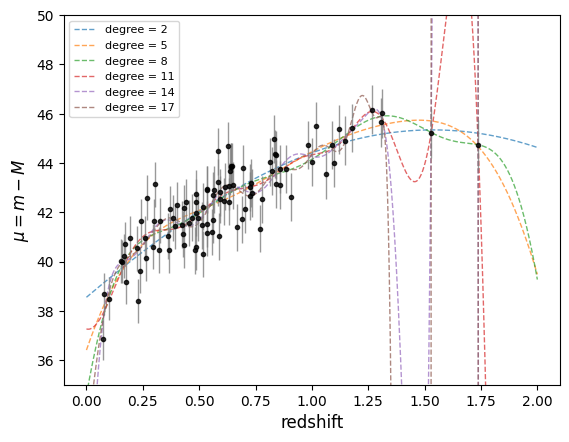

In [7]:
from astroML.linear_model import BasisFunctionRegression
colors = sns.color_palette()
for degree in np.arange(1,20)[1::3]:

    basis_mu = np.linspace(0,2,degree)[:, None]
    basis_sigma = 1.0 * (basis_mu[1] - basis_mu[0])

    model = BasisFunctionRegression('gaussian', mu=basis_mu, sigma=basis_sigma)
    model.fit(x, y, dmu)
    x_grid = np.linspace(0, 2, 1000)[:, None]
    y_pred = model.predict(x_grid)
    n_constraints = degree + 1

    plt.plot(x_grid, y_pred,linestyle = "--", alpha = 0.7, linewidth=1, label="degree = %i" % degree)
    plt.xlabel("redshift", fontsize=12)
    plt.ylabel("$\mu = m-M$", fontsize=12)
    plt.legend(loc="upper left", fontsize=8)
    #plt.xlim(0,1.8)
    plt.ylim(35,50)

plt.errorbar(x, y, dmu, fmt='.k', ecolor='gray', alpha = 0.8, lw=1,label='data')

## Let's do cross validation

In [8]:
from sklearn.model_selection import train_test_split



# split the data into train, cross-validation, and test sets: train : 60%, cross-validation: 20%, test: 20%
x_train, x_cvtest, y_train, y_cvtest, dy_train, dy_cvtest = train_test_split(x, y, dmu, test_size=0.4, random_state=42)
x_cross_val, x_test, y_cross_val, y_test, dy_cross_val, dy_test = train_test_split(x_cvtest, y_cvtest, dy_cvtest, test_size=0.5, random_state=42)



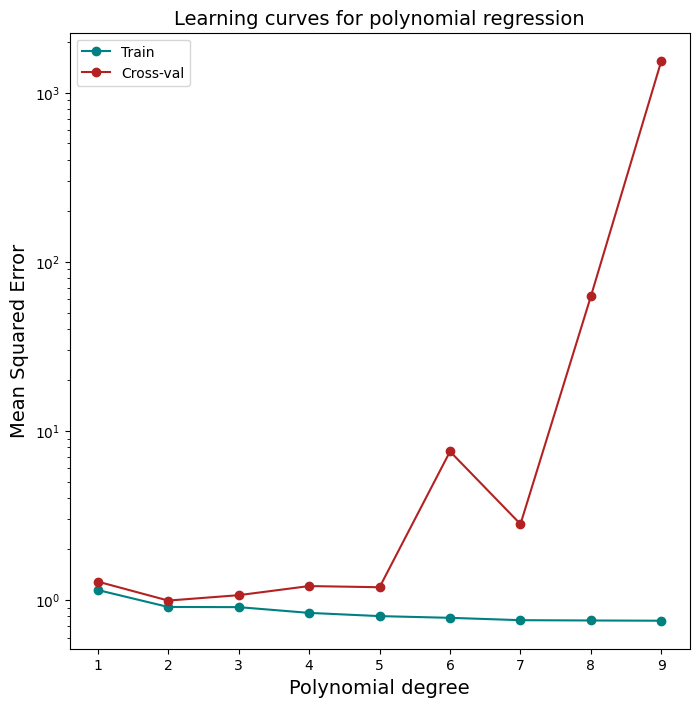

In [66]:
from astroML.linear_model import PolynomialRegression
from sklearn.model_selection import KFold

degree = np.arange (1, 10)


kf = KFold(n_splits=10, shuffle=True, random_state=42)

training_err = np.zeros(degree.shape)
crossval_err = np.zeros(degree.shape)

colors = sns.color_palette()

fig = plt.figure(figsize=(8, 8))

for i in range(len(degree)):
    model = PolynomialRegression(degree[i])
    cv_errors = []
    train_errors = []
    for train_index, val_index in kf.split(x_train):
        x_train_cv, x_val_cv = x_train[train_index], x_train[val_index]
        y_train_cv, y_val_cv = y_train[train_index], y_train[val_index]
        dy_train_cv, dy_val_cv = dy_train[train_index], dy_train[val_index]
        
        model.fit(x_train_cv, y_train_cv, dy_train_cv)
        y_val_pred = model.predict(x_val_cv)
        y_train_pred = model.predict(x_train_cv)
        cv_errors.append(np.mean((y_val_cv - y_val_pred) ** 2))
        train_errors.append(np.mean((y_train_cv - y_train_pred) ** 2))
    crossval_err[i] = np.mean(cv_errors)
    training_err[i] = np.mean(train_errors)

crossval_err = crossval_err

plt.plot(degree, training_err, 'o-', color="teal", label="Train")
plt.plot(degree, crossval_err, 'o-', color="firebrick", label="Cross-val")
plt.yscale('log')
                  
plt.xlabel("Polynomial degree",fontsize=14)
plt.ylabel("Mean Squared Error",fontsize=14)
plt.title('Learning curves for polynomial regression',fontsize=14)
#plt.yscale("log")
plt.legend(loc="best")

In [68]:
# then I select the best model and test it on the test set

best_degree = degree[np.argmin(crossval_err)]
model = PolynomialRegression(best_degree)
model.fit(x_train, y_train, dy_train)
test_err = np.mean((y_test - model.predict(x_test)) ** 2)
print("Best degree = %i" % best_degree)
print("Test error = %.2f" % test_err)


Best degree = 2
Test error = 0.71


6


" #at first I did the cross validation not doing the k-folds, just splitting it once\nfor i in range(len(degrees)):\n\n    basis_mu = np.linspace(0,2, degrees[i])[:, None]\n    basis_sigma = 1.0 * (basis_mu[1] - basis_mu[0])\n\n    model = BasisFunctionRegression('gaussian', mu=basis_mu, sigma=basis_sigma)\n    model.fit(x_train, y_train, dy_train)\n    y_pred = model.predict(x_grid)\n    training_err[i] = np.mean((y_train - model.predict(x_train)) ** 2)\n    crossval_err[i] = np.mean((y_cross_val - model.predict(x_cross_val)) ** 2)"

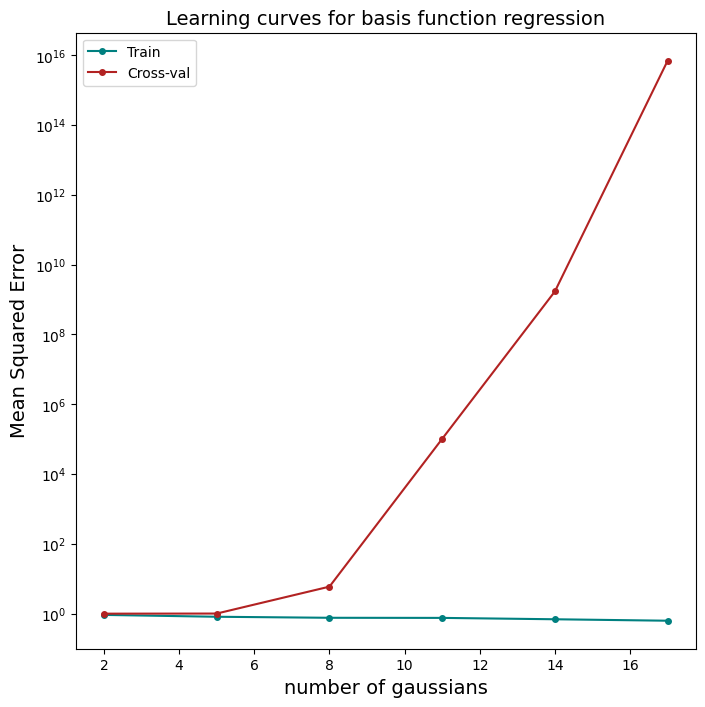

In [56]:
from astroML.linear_model import BasisFunctionRegression
colors = sns.color_palette()

degrees = np.arange(1, 20)[1::3]
print(len(degrees))

training_err = np.zeros(len(degrees))
crossval_err = np.zeros(len(degrees))

fig = plt.figure(figsize=(8, 8))

for i in range(len(degrees)):
    basis_mu = np.linspace(0,2, degrees[i])[:, None]
    basis_sigma = 1.0 * (basis_mu[1] - basis_mu[0])

    model = BasisFunctionRegression('gaussian', mu=basis_mu, sigma=basis_sigma)
    cv_errors = []
    train_errors = []
    for train_index, val_index in kf.split(x_train):
        x_train_cv, x_val_cv = x_train[train_index], x_train[val_index]
        y_train_cv, y_val_cv = y_train[train_index], y_train[val_index]
        dy_train_cv, dy_val_cv = dy_train[train_index], dy_train[val_index]
        
        model.fit(x_train_cv, y_train_cv, dy_train_cv)
        y_val_pred = model.predict(x_val_cv)
        y_train_pred = model.predict(x_train_cv)
        cv_errors.append(np.mean((y_val_cv - y_val_pred) ** 2))
        train_errors.append(np.mean((y_train_cv - y_train_pred) ** 2))
    crossval_err[i] = np.mean(cv_errors)
    training_err[i] = np.mean(train_errors)

crossval_err = crossval_err


plt.plot(degrees, training_err, 'o-', markersize = 4, color="teal", label="Train")
plt.plot(degrees, crossval_err, 'o-', markersize = 4, color="firebrick", label="Cross-val")
plt.yscale('log')
                  
plt.xlabel("number of gaussians",fontsize=14)
plt.ylabel("Mean Squared Error",fontsize=14)
plt.title('Learning curves for basis function regression',fontsize=14)
plt.legend(loc="best")


''' #at first I did the cross validation not doing the k-folds, just splitting it once
for i in range(len(degrees)):

    basis_mu = np.linspace(0,2, degrees[i])[:, None]
    basis_sigma = 1.0 * (basis_mu[1] - basis_mu[0])

    model = BasisFunctionRegression('gaussian', mu=basis_mu, sigma=basis_sigma)
    model.fit(x_train, y_train, dy_train)
    y_pred = model.predict(x_grid)
    training_err[i] = np.mean((y_train - model.predict(x_train)) ** 2)
    crossval_err[i] = np.mean((y_cross_val - model.predict(x_cross_val)) ** 2)'''


In [60]:
np.argmin(crossval_err)

0

In [63]:
# then I select the best model and test it on the test set

best_degree = degrees[np.argmin(crossval_err)]
basis_mu = np.linspace(0,2, best_degree)[:, None]
basis_sigma = 1.0 * (basis_mu[1] - basis_mu[0])

model = BasisFunctionRegression('gaussian', mu=basis_mu, sigma=basis_sigma)
model.fit(x_train, y_train, dy_train)
test_err = np.mean((y_test - model.predict(x_test)) ** 2)
print("Best degree = %i" % best_degree)
print("Test error = %.2f" % test_err)


Best degree = 2
Test error = 0.71


/home/malvi/venv/lib/python3.12/site-packages/astroML/linear_model/kernel_regression.py:52: RuntimeWarning: invalid value encountered in divide
  return (K * self.y).sum(1) / K.sum(1)
/home/malvi/venv/lib/python3.12/site-packages/astroML/linear_model/kernel_regression.py:52: RuntimeWarning: invalid value encountered in divide
  return (K * self.y).sum(1) / K.sum(1)
/home/malvi/venv/lib/python3.12/site-packages/astroML/linear_model/kernel_regression.py:52: RuntimeWarning: invalid value encountered in divide
  return (K * self.y).sum(1) / K.sum(1)
/home/malvi/venv/lib/python3.12/site-packages/astroML/linear_model/kernel_regression.py:52: RuntimeWarning: invalid value encountered in divide
  return (K * self.y).sum(1) / K.sum(1)
/home/malvi/venv/lib/python3.12/site-packages/astroML/linear_model/kernel_regression.py:52: RuntimeWarning: invalid value encountered in divide
  return (K * self.y).sum(1) / K.sum(1)
/home/malvi/venv/lib/python3.12/site-packages/astroML/linear_model/kernel_regres

"\nfor i in range(len(h)):\n    model =  NadarayaWatson(kernel='gaussian', h=h[i])\n\n    model.fit(x_train, y_train, dy_train)\n    y_pred = model.predict(x_grid)\n    training_err[i] = np.mean((y_train - model.predict(x_train)) ** 2)\n    crossval_err[i] = np.mean((y_cross_val - model.predict(x_cross_val)) ** 2)\n\n"

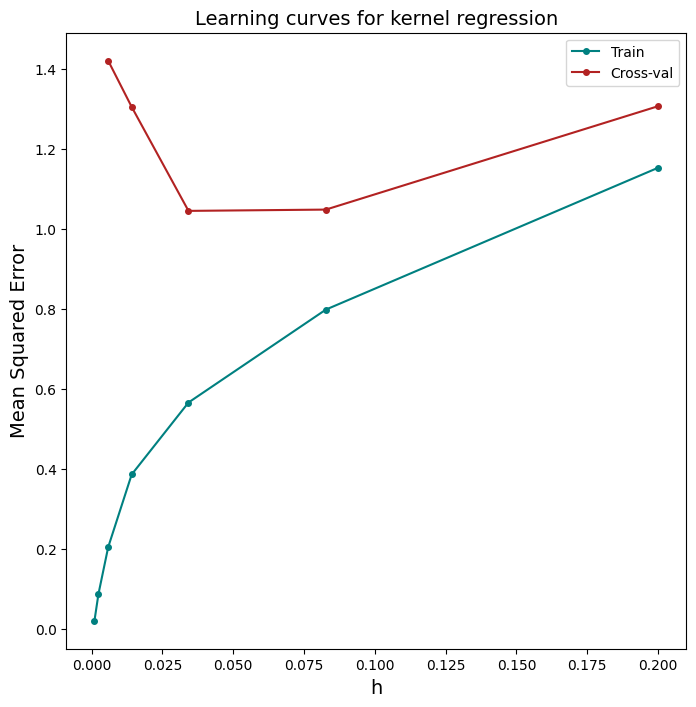

In [70]:

h =  np.geomspace(0.001, 0.20, 7)

training_err = np.zeros(len(h))
crossval_err = np.zeros(len(h))

fig = plt.figure(figsize=(8, 8))

for i in range(len(h)):
    model = NadarayaWatson(kernel='gaussian', h=h[i])
    cv_errors = []
    train_errors = []
    for train_index, val_index in kf.split(x_train):
        x_train_cv, x_val_cv = x_train[train_index], x_train[val_index]
        y_train_cv, y_val_cv = y_train[train_index], y_train[val_index]
        dy_train_cv, dy_val_cv = dy_train[train_index], dy_train[val_index]
        
        model.fit(x_train_cv, y_train_cv, dy_train_cv)
        y_val_pred = model.predict(x_val_cv)
        y_train_pred = model.predict(x_train_cv)
        cv_errors.append(np.mean((y_val_cv - y_val_pred) ** 2))
        train_errors.append(np.mean((y_train_cv - y_train_pred) ** 2))
    crossval_err[i] = np.mean(cv_errors)
    training_err[i] = np.mean(train_errors)


plt.plot(h, training_err, 'o-', markersize = 4, color="teal", label="Train")
plt.plot(h, crossval_err, 'o-', markersize = 4, color="firebrick", label="Cross-val")
                  
plt.xlabel("h",fontsize=14)
plt.ylabel("Mean Squared Error",fontsize=14)
plt.title('Learning curves for kernel regression',fontsize=14)
plt.legend(loc="best")

'''
for i in range(len(h)):
    model =  NadarayaWatson(kernel='gaussian', h=h[i])

    model.fit(x_train, y_train, dy_train)
    y_pred = model.predict(x_grid)
    training_err[i] = np.mean((y_train - model.predict(x_train)) ** 2)
    crossval_err[i] = np.mean((y_cross_val - model.predict(x_cross_val)) ** 2)

'''


In [78]:
# then I select the best model and test it on the test set

best_h = h[np.argmin(crossval_err)]

model = NadarayaWatson(kernel='gaussian', h=best_h)
model.fit(x_train, y_train, dy_train)
test_err = np.mean((y_test - model.predict(x_test)) ** 2)
print("Best h = %i" % best_degree)
print("Test error = %.2f" % test_err)


Best h = 2
Test error = nan


/home/malvi/venv/lib/python3.12/site-packages/astroML/linear_model/kernel_regression.py:52: RuntimeWarning: invalid value encountered in divide
  return (K * self.y).sum(1) / K.sum(1)


In [48]:
from sklearn.metrics import mean_squared_error
import numpy as np

# can I compare the three models? (polynomial, basis function, kernel regression)

# I can use AIC and BIC:

# Calculate AIC and BIC for a given model
def calculate_aic_bic(model, x, y, dy, n_params):
    y_pred = model.predict(x)
    mse = mean_squared_error(y, y_pred, sample_weight=1/dy**2)
    n = len(y)
    aic = n * np.log(mse) + 2 * n_params
    bic = n * np.log(mse) + n_params * np.log(n)
    return aic, bic

# Polynomial Regression
polynomial_model = PolynomialRegression(best_degree)
polynomial_model.fit(x_train, y_train, dy_train)
aic_poly, bic_poly = calculate_aic_bic(polynomial_model, x_cross_val, y_cross_val, dy_cross_val, best_degree + 1)

# Basis Function Regression
basis_model = BasisFunctionRegression('gaussian', mu=basis_mu, sigma=basis_sigma)
basis_model.fit(x_train, y_train, dy_train)
aic_basis, bic_basis = calculate_aic_bic(basis_model, x_cross_val, y_cross_val, dy_cross_val, len(basis_mu) + 1)

# Kernel Regression
kernel_model = NadarayaWatson(kernel='gaussian', h=h[i])
kernel_model.fit(x_train, y_train, dy_train)
aic_kernel, bic_kernel = calculate_aic_bic(kernel_model, x_cross_val, y_cross_val, dy_cross_val, 1)  # h is the only parameter

print(f"Polynomial Regression: AIC = {aic_poly}, BIC = {bic_poly}")
print(f"Basis Function Regression: AIC = {aic_basis}, BIC = {bic_basis}")
print(f"Kernel Regression: AIC = {aic_kernel}, BIC = {bic_kernel}")

Polynomial Regression: AIC = -1.0479498065739268, BIC = 1.9392470140880462
Basis Function Regression: AIC = 35.34865360171514, BIC = 53.27183452568698
Kernel Regression: AIC = -4.48201049308827, BIC = -3.4862782195342787


# Lecture 18

In [90]:
from sklearn.gaussian_process import GaussianProcessRegressor, kernels
from scipy.optimize import fmin_cobyla

First let's fit our supernova synthetic data from last time using GPR.

- The key ingredient in getting a good GPR fit is the choice of the kernel and its parameters.
- Check out what's available in the `kernels` submodule of [sklearn.gaussian_process](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.gaussian_process)
- *Hint*. Radial-basis function kernel (aka squared-exponential kernel) is a standard choice in the GPR world.
- Plot the expectation value of the fit as well as the resulting 1-$\sigma$ and 2-$\sigma$ contours.
- Interpret the results.

*Note*. We have time constraints, so feel free to tweak the hyperparameters manually while in class. But, of course, a publication-quality result will require a cross-validation analysis. (Do this at home before the exam?)We now have a suite of **data-driven** predictive models for our supernova dataset (from polynomials to GPR). That is: we can faithfully predict how a future redshift/distance measurement will look like given the current sample.

This is already great and these kind of tools are immensely useful in a variety of contexts (also involving a lot of money: suppose you want to predict how much a give financial asset will perform on tomorrow's stock market... You  might not really care about expressing the underlying financial model in simple terms, as long as your investments are profitable).

For the case of supernovae, however, we have do have physical theory which is $\Lambda$CDM. We can do a **parametric** fit (and hopehully by now the difference between "parametric" and "data driven" fit is clear in your head)

- First, refresh your cosmology and write down the predicted relationship between the distance module $\mu$ and the redshift $\sigma$. *Hint* I always forget these things, my to-go reference is [Hogg (2010)](https://arxiv.org/abs/astro-ph/9905116). I got:

$$\mu = 5 \log \left( \frac{c/H_0} {10 {\rm pc}}(1+z)\int_0^z \frac{dz'}{\sqrt{\Omega_m (1+z^3)+\Omega_\Lambda}} \right) $$


- Assuming a flat Universe,  we have a parametric non-linear model for $\mu(z)$ that depends on two parameters, the Hubble constant $H_0$ and the matter content of the Universe $\Omega_m$
- It's a very non-linear model. Fit it to the data (however you want to do it, are you frequentist or Bayesian after all?).
- What are the measured value of $H_0$ and $\Omega_m$. Are they correlated?
- How would a model without dark energy (i.e. $\Omega_m=1$) perform? Do these data contain evidence of dark energy? (Hint: this is a model selection problem!)

The European Space Agency is considering new cosmology-related space mission. They ask you to figure out what science you can do with 10 times more measurement compared to what you have right now. That is: you want to clone your data. We've seen this earlier in the class, but now we can do much much better.
- Think about the pdf of these data in $z$.
- Using both the GPR fit and your latest $\Lambda$CDM fit, generate a set of $\mu$ measurements that respects the statistical properties of the data you were given. 



<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_230790/458091770.py:4: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu$")


(35.0, 50.0)

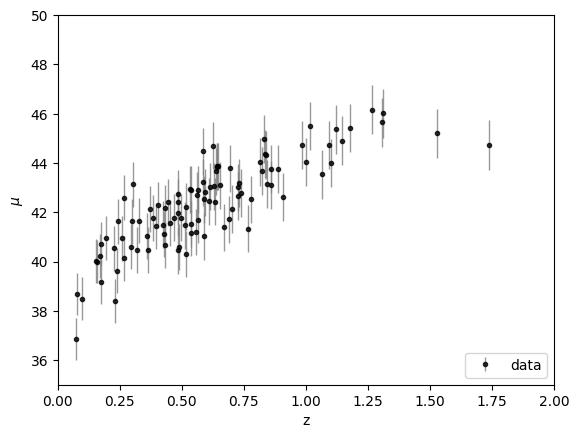

In [91]:
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', alpha = 0.8, lw=1,label='data')

plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)

kernel_1 = kernels.RBF(length_scale=1.0, length_scale_bounds=(1e-05, 100000.0))

In [92]:
np.random.seed(1)
x = np.linspace(0, 2, 100) 

kernel_1 = kernels.RBF() 


gp = GaussianProcessRegressor(kernel=kernel_1, alpha=dmu ** 2,normalize_y = True, random_state=0)
gp.fit(z_sample[:, None], mu_sample)
f, f_err = gp.predict(x[:, None], return_std=True)


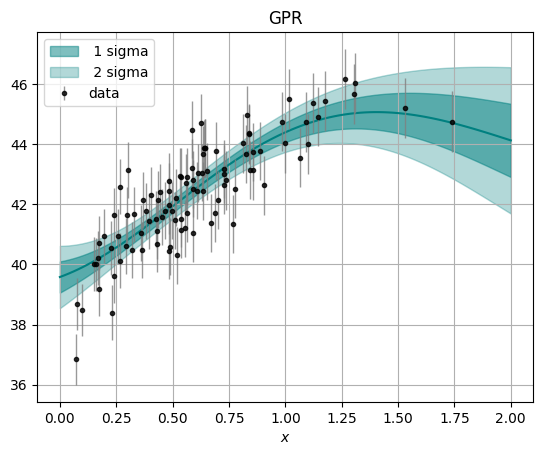

In [93]:
plt.plot(x, f, '-', color='teal')

plt.fill_between(x, f - 1 * f_err, f + 1 * f_err, color='teal', alpha=0.5, label = " 1 sigma")
plt.fill_between(x, f - 2 * f_err, f + 2 * f_err, color='teal', alpha=0.3, label = " 2 sigma")

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', alpha = 0.8, lw=1,label='data')

#plt.plot(x, np.cos(x), ':k')
plt.xlabel('$x$')
plt.title("GPR")
plt.legend()
plt.grid()


$$\mu = 5 \log \left( \frac{c/H_0} {10 {\rm pc}}(1+z)\int_0^z \frac{dz'}{\sqrt{\Omega_m (1+z^3)+\Omega_\Lambda}} \right) $$


- Assuming a flat Universe,  we have a parametric non-linear model for $\mu(z)$ that depends on two parameters, the Hubble constant $H_0$ and the matter content of the Universe $\Omega_m$
- It's a very non-linear model. Fit it to the data (however you want to do it, are you frequentist or Bayesian after all?).
- What are the measured value of $H_0$ and $\Omega_m$. Are they correlated?
- How would a model without dark energy (i.e. $\Omega_m=1$) perform? Do these data contain evidence of dark energy? (Hint: this is a model selection problem!)

The European Space Agency is considering new cosmology-related space mission. They ask you to figure out what science you can do with 10 times more measurement compared to what you have right now. That is: you want to clone your data. We've seen this earlier in the class, but now we can do much much better.
- Think about the pdf of these data in $z$.
- Using both the GPR fit and your latest $\Lambda$CDM fit, generate a set of $\mu$ measurements that respects the statistical properties of the data you were given. 



In [94]:
import emcee
import numpy as np
from scipy.integrate import quad

def distance_modulus(z, H0, Omega_m):
    c = 299792.458
    
    def integrand(z_prime):
        return 1.0 / np.sqrt(Omega_m * (1 + z_prime)**3 + (1 - Omega_m))
    
    if np.isscalar(z):
        integral, _ = quad(integrand, 0, z)
    else:
        integral = np.array([quad(integrand, 0, zi)[0] for zi in z])
    
    return 5 * np.log10((c / H0) * (1 + z) * integral) + 25


In [95]:
def log_likelihood(theta, z, mu, dmu):
    H0, Omega_m = theta
    model = distance_modulus(z, H0, Omega_m)
    sigma_squared = dmu**2
    return -0.5 * np.sum((mu - model)**2 / sigma_squared + np.log( sigma_squared))


def log_prior(theta):
    H0, Omega_m = theta
    if 50 < H0 < 100 and 0 < Omega_m < 1:
        return 0.0
    return -np.inf

def log_posterior(theta, z, mu, dmu):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, z, mu, dmu)

In [101]:
# Let's do an MCMC

# I want to save the results of the MCMC in a file, so I run it only if I haven't already

import os   
filename = "mcmc_results_SN_2par.npy"


if not os.path.exists(filename):
    nwalkers = 32
    ndim = 2
    initial = np.array([70, 0.3])
    pos = initial + 1e-4 * np.random.randn(nwalkers, ndim)

    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(z_sample, mu_sample, dmu ))

    sampler.run_mcmc(pos, 5000, progress=True)

    chain = sampler.chain
    log_prob = sampler.get_log_prob()
    samples= sampler.get_chain(discard=100, thin=15, flat=True)
    samples_not_thinned = sampler.get_chain()

    np.save(filename, {
        'chain': chain,
        'samples': samples,
        'samples_not_thinned': samples_not_thinned,
        'log_prob': log_prob
    })

else:
    print(f"Loading existing MCMC results from {filename}")
    data = np.load(filename, allow_pickle=True)
    results = data.item()
    chain = results['chain']
    log_prob = results['log_prob']
    samples = results['samples']
    samples_not_thinned = results['samples_not_thinned']


Loading existing MCMC results from mcmc_results_SN_2par.npy


In [103]:
#samples_not_thinned = sampler.get_chain()
samples = samples
nwalkers = 32
ndim = 2

<>:6: SyntaxWarning: invalid escape sequence '\O'
<>:6: SyntaxWarning: invalid escape sequence '\O'
/tmp/ipykernel_230790/1031637034.py:6: SyntaxWarning: invalid escape sequence '\O'
  labels = ["$H_0$", "$\Omega_m$"]
/tmp/ipykernel_230790/1031637034.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(samples_not_thinned[:, :, i], "k", alpha=0.3, color = "teal")


(32, 5000, 2)


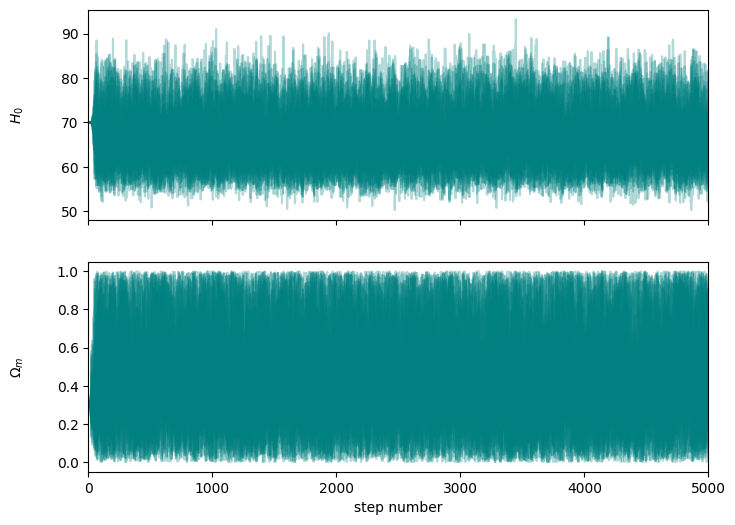

In [105]:
print(chain.shape)
nwalkers = 32
ndim = 2
fig, axes = plt.subplots(2, figsize=(8, 6), sharex=True)
#samples = sampler.get_chain()
labels = ["$H_0$", "$\Omega_m$"]

for i in range(ndim):
    ax = axes[i]
    ax.plot(samples_not_thinned[:, :, i], "k", alpha=0.3, color = "teal")
    ax.set_xlim(0, len(samples_not_thinned))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [106]:
# burn-in and thin 
#samples = sampler.get_chain(discard=1000, thin=15, flat=True)

H0_mcmc, Omega_m_mcmc = np.median(samples, axis=0)

print(f"H0 = {H0_mcmc:.2f}")
print(f"Omega_m = {Omega_m_mcmc:.2f}")

H0 = 66.52
Omega_m = 0.44


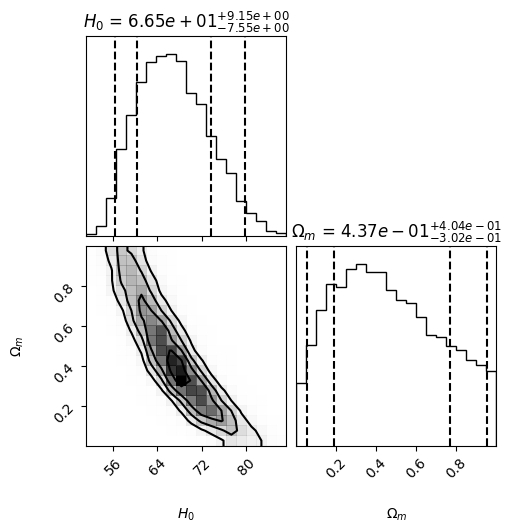

In [107]:
import corner
#I don't have the true values, I can plot the values i got from max likelihood estimation
fig = corner.corner(samples, labels=labels, 
                    quantiles= (0.025, 0.16, 0.84,0.9725), 
                    color = "black", title_quantiles=(0.10, 0.5, 0.90), 
                    show_titles=True, title_fmt='.2e', title_kwargs={"fontsize": 12},
                    plot_contours=True, plot_density=True, plot_datapoints=False, smooth=0.5);

<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_230790/4035993828.py:7: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu$")
/tmp/ipykernel_230790/1696655505.py:16: RuntimeWarning: divide by zero encountered in log10
  return 5 * np.log10((c / H0) * (1 + z) * integral) + 25


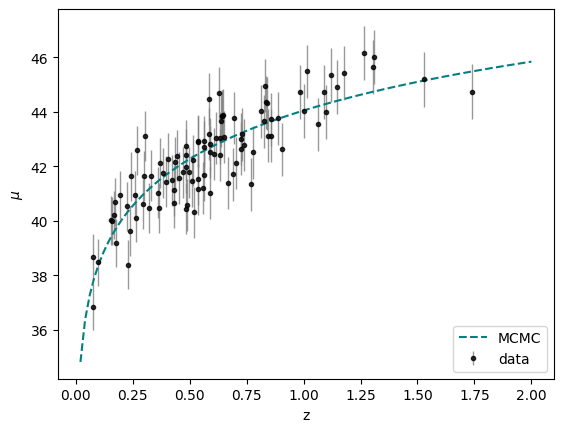

In [108]:
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', alpha = 0.8, lw=1,label='data')

x_grid = np.linspace(0, 2, 100)
plt.plot(x_grid, distance_modulus(x_grid, H0_mcmc, Omega_m_mcmc), color = "teal", linestyle = "--", label="MCMC")

plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')


In [109]:
# Let's try the same model with Omega_m = 1 

def log_likelihood(theta, z, mu, dmu):
    H0 = theta
    Omega_m = 1
    model = distance_modulus(z, H0, Omega_m)
    sigma_squared = dmu**2
    return -0.5 * np.sum((mu - model)**2 / sigma_squared + np.log( sigma_squared))

def log_prior(theta):
    H0 = theta
    if 50 < H0 < 100:
        return 0.0
    return -np.inf

def log_posterior(theta, z, mu, dmu):    
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, z, mu, dmu)


In [110]:
# Let's do an MCMC

# I want to save the results of the MCMC in a file, so I run it only if I haven't already
filename = "mcmc_results_SN_1par.npy"


if not os.path.exists(filename):
    nwalkers = 32
    ndim = 1
    initial = 70
    pos = initial + 1e-4 * np.random.randn(nwalkers, ndim)

    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(z_sample, mu_sample, dmu ))

    sampler.run_mcmc(pos, 5000, progress=True)

    chain_1par = sampler.chain
    log_prob_1par = sampler.get_log_prob()
    samples_1par = sampler.get_chain(discard=100, thin=15, flat=True)
    samples_1par_not_thinned = sampler.get_chain()

    np.save(filename, {
        'chain': chain_1par,
        'samples': samples_1par,
        'samples_not_thinned': samples_1par_not_thinned,
        'log_prob': log_prob_1par
    })

else:
    print(f"Loading existing MCMC results from {filename}")
    data = np.load(filename, allow_pickle=True) 
    results = data.item()
    chain_1par= results['chain']
    log_prob_1par = results['log_prob']
    samples_1par= results['samples']
    samples_1par_not_thinned = results ['samples_not_thinned']

Loading existing MCMC results from mcmc_results_SN_1par.npy


(32, 5000, 1)


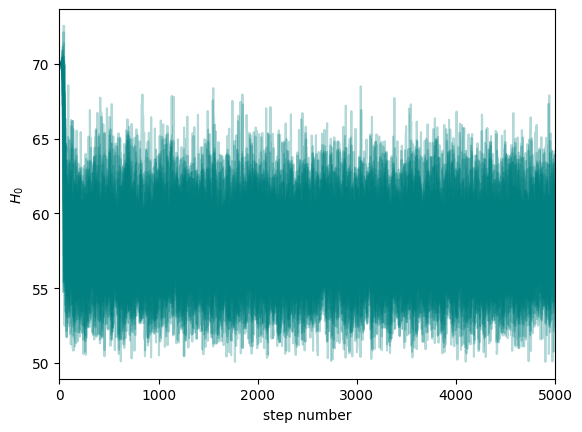

In [111]:
print(chain_1par.shape)

#samples = sampler.get_chain()
labels = ["$H_0$"]


plt.plot(samples_1par_not_thinned[:, :, 0], alpha=0.3, color = "teal")
plt.xlim(0, len(samples_1par_not_thinned))
plt.ylabel(labels[0])
#plt.yaxis.set_label_coords(-0.1, 0.5)

plt.xlabel("step number");

In [112]:
# burn-in and thin 
#samples = sampler.get_chain(discard=1000, thin=15, flat=True)

H0_mcmc_only_matter= np.median(samples_1par)

print(f"H0 = {H0_mcmc:.2f}")

H0 = 66.52


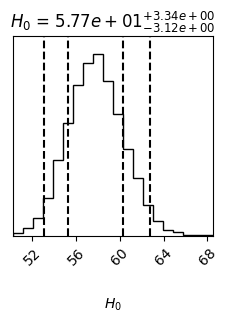

In [113]:
import corner
#I don't have the true values, I can plot the values i got from max likelihood estimation
fig = corner.corner(samples_1par, labels=labels, 
                    quantiles= (0.025, 0.16, 0.84,0.9725), 
                    color = "black", title_quantiles=(0.10, 0.5, 0.90), 
                    show_titles=True, title_fmt='.2e', title_kwargs={"fontsize": 12},
                    plot_contours=True, plot_density=True, plot_datapoints=False, smooth=0.5);

### to compare the models I should do nested sampling, so I can get the evidence and compute the bayes factor

In [116]:
import dynesty
from dynesty import NestedSampler

# Model with Omega_m as a free parameter

def log_likelihood(theta, z, mu, dmu):
    H0, Omega_m = theta
    model = distance_modulus(z, H0, Omega_m)
    sigma_squared = dmu**2
    return -0.5 * np.sum((mu - model)**2 / sigma_squared + np.log( sigma_squared))


def prior_transform(theta):
    H0, Omega_m = theta
    H0 = 50 + 50 * H0  # transform from unit cube to [50, 100]
    Omega_m = Omega_m  # transform from unit cube to [0, 1]
    return H0, Omega_m

sampler = NestedSampler(log_likelihood, prior_transform, ndim=2, nlive=500, logl_args=(z_sample, mu_sample, dmu))
sampler.run_nested()
res = sampler.results

#evidence
logZ = res.logz[-1]
H0_mcmc, Omega_m_mcmc = res.samples[-1]

print(f"Model with Omega_m as a free parameter: logZ = {logZ}, H0 = {H0_mcmc}, Omega_m = {Omega_m_mcmc}")

#--------------------------------------------------------------------------
# Model with Omega_m = 1

def log_likelihood_omega_m_1(theta, z, mu, dmu):
    H0 = theta[0]
    Omega_m = 1
    model = distance_modulus(z, H0, Omega_m)
    sigma_squared = dmu**2
    return -0.5 * np.sum((mu - model)**2 / sigma_squared + np.log(sigma_squared))

def prior_transform_omega_m_1(theta):
    H0 = theta[0]
    H0 = 50 + 50 * H0  #transform from unit cube to [50, 100]
    return [H0]

sampler_omega_m_1 = NestedSampler(log_likelihood_omega_m_1, prior_transform_omega_m_1, ndim=1, nlive=500, logl_args=(z_sample, mu_sample, dmu))
sampler_omega_m_1.run_nested()
res_omega_m_1 = sampler_omega_m_1.results

#evidence
logZ_omega_m_1 = res_omega_m_1.logz[-1]
H0_mcmc_only_matter = res_omega_m_1.samples[-1]

print(f"Model with Omega_m = 1: logZ = {logZ_omega_m_1}, H0 = {H0_mcmc_only_matter}")

1554it [00:49, 31.26it/s, +500 | bound: 0 | nc: 1 | ncall: 10493 | eff(%): 20.554 | loglstar:   -inf < -40.920 <    inf | logz: -43.169 +/-  0.043 | dlogz:  0.001 >  0.509]


Model with Omega_m as a free parameter: logZ = -43.169008899901385, H0 = 68.56548559389441, Omega_m = 0.3402038055872575


1447it [00:39, 36.98it/s, +500 | bound: 0 | nc: 1 | ncall: 9955 | eff(%): 20.592 | loglstar:   -inf < -41.637 <    inf | logz: -43.625 +/-  0.028 | dlogz:  0.001 >  0.509]

Model with Omega_m = 1: logZ = -43.62483988770449, H0 = [57.61258548]


In [118]:
print(f"Bayes factor: {np.exp(logZ - logZ_omega_m_1)}")
print("the model with Omega_m as a free parameter is favoured")

Bayes factor: 1.577483708247602
the model with Omega_m as a free parameter is favoured


# Cloning data

<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_23703/2439985015.py:18: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu$")
/tmp/ipykernel_23703/2439985015.py:20: SyntaxWarning: invalid escape sequence '\m'
  plt.title("Generated $\mu$ measurements using GPR and ΛCDM")


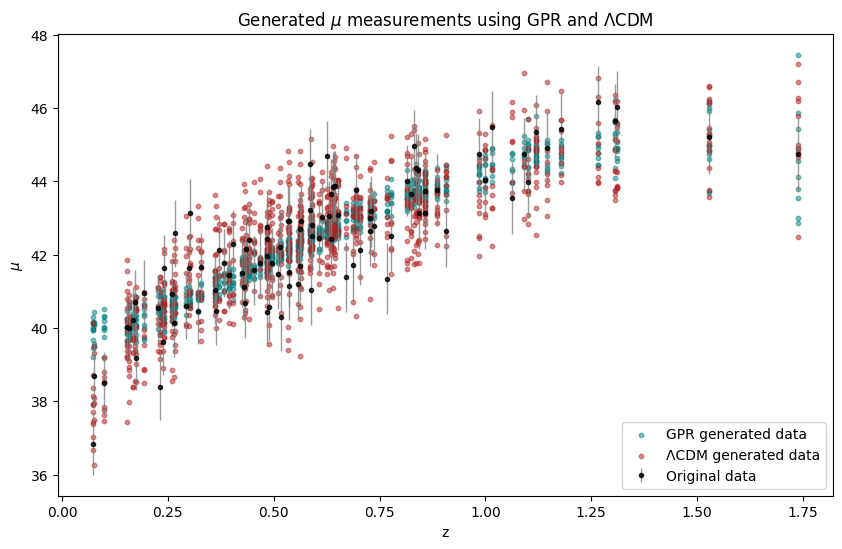

In [211]:
z_new = np.random.choice(z_sample, size=10 * len(z_sample), replace=True)

# using GPR
mu_gpr, mu_gpr_err = gp.predict(z_new[:, None], return_std=True)
mu_gpr += np.random.normal(0, mu_gpr_err)

# using ΛCDM
mu_lcdm = distance_modulus(z_new, H0_mcmc, Omega_m_mcmc)
mu_lcdm += np.random.normal(0, dmu.mean(), size=mu_lcdm.shape)

# Plot the results
plt.figure(figsize=(10, 6))
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', alpha=0.8, lw=1, label='Original data')
plt.scatter(z_new, mu_gpr, color='teal', s=10, alpha=0.5, label='GPR generated data')
plt.scatter(z_new, mu_lcdm, color='firebrick', s=10, alpha=0.5, label='ΛCDM generated data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.title("Generated $\mu$ measurements using GPR and ΛCDM")
plt.show()